In [2]:
import subprocess
import os
import sys
import time

In [61]:
print(os.popen('wsl \
                    tcsh ./app/tools/gibbscluster-2.0/gibbscluster \
                    -f ./data/202012088/VMM1/VMM1_1st_nil_DT9_peptide.txt \
                    -k 4 -g 1-2 \
                    -H ./app/tools/R/bin/R \
                    -G ./../../app/tools/seq2logo-2.1/Seq2Logo.py').read())

#Call: app/tools/gibbscluster-2.0/GibbsCluster-2.0e_SA.pl -f ./data/202012088/VMM1/VMM1_1st_nil_DT9_peptide.txt -k 4 -g 1-2 -H ./app/tools/R/bin/R -G ./../../app/tools/seq2logo-2.1/Seq2Logo.py
#Tue Dec  8 21:02:30 2020
#Session ID: 15
#Run name: 15
#Read 585 unique sequences
##### Settings: #####
#Shift moves and cluster moves are activated
#Number of clusters: 1 - 2
#Motif length: 9
#Initial MC temperture: 1.5
#Number of temperature steps: 20
#Number of iterations x Sequence x Tstep: 10
#Max insertion length: 0
#Max deletion length: 0
#Interval between Single Peptide moves: 20
#Interval between Phase Shift moves: 100
#Number of initial seeds: 1
#Penalty lambda: 0.8
#Weight on small clusters: 5
#Preference for hydrophobic P1: 0
#Sequence weighting type: 0
#Use trash cluster to remove outliers: 0
#### Running Gibbs clustering...
#Clustering with 1 groups, seed number 1
#Clustering with 2 groups, seed number 1
#Clustering complete!
### Determining seeds with highest KLD...
#Best 1 groups

In [4]:
print(os.popen('wsl \
                    tcsh ./app/tools/gibbscluster-2.0/gibbscluster \
                        -h').read())

app/tools/gibbscluster-2.0/GibbsCluster-2.0e_SA.pl
.

Usage: app/tools/gibbscluster-2.0/GibbsCluster-2.0e_SA.pl -f peptidelist [-g number of clusters] [-h] [more options]
Command line options:
  -f       upload training set (Peptide || Peptide TAB Annotation)
  -P       name for this run (no spaces)
  -g (1-5) number of clusters (as single number [3] or interval [1-5])
  -l (9)   motif length
  -i (10)  number of iterations x sequence x T step
  -t (1.5) start MC temperature
  -n (20)  number of temperature steps
  -b (0.8) lambda penalty on inter-cluster similarity
  -q (5)   sigma weight on small alignments
  -T       use trash cluster to remove outliers (switch)
  -j (0)   threshold for trash cluster
  -C       perform Single sequence moves at every iteration (default is every -r iterations)
  -u (10)  interval between Indel moves
  -r (20)  interval between Single sequence moves
  -s (100) interval betweem Phase shift moves
  -D (0)   max length of deletions
  -I (0)   max length o

In [59]:
data1 = pd.read_csv('../temp/VMM/VMM1_1st_nil_DT9_peptide.csv')
data2 = pd.read_csv('../temp/VMM/VMM1_2nd_nil_DT9_peptide.csv')
data3 = pd.read_csv('../temp/VMM/VMM1_3rd_nil_DT9_peptide.csv')

data1['sample'] = 'one'
data2['sample'] = 'two'

data3['sample'] = 'three'

In [60]:
data ={}
data['one'] = data1
data['two'] = data2
data['three'] = data3

In [61]:
data = filterPeaksFile(data)

In [134]:
temp = data['one']
temp = temp[temp.Length == 9]
# counts_mat = logomaker.alignment_to_matrix(temp['Peptide'])
# counts_mat.head()

a = 'asdasd.csv'
a[:-4]

'asdasd'

In [139]:
temp['Peptide'].to_csv('data/hi.txt', header=False, index=False)

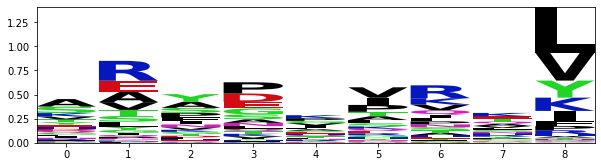

In [74]:
info_mat = logomaker.transform_matrix(counts_mat, 
                                      from_type='counts', 
                                      to_type='information')
logomaker.Logo(info_mat)

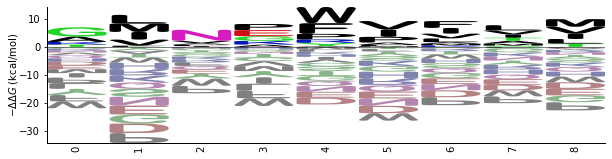

In [122]:
temp = psm.reset_index(level=[0,1], drop=True)

# logo = lm.Logo(df=temp,
#               center_values=True,
#               font_name = 'Arial Rounded MT Bold')


# create Logo object
crp_logo = logomaker.Logo(temp,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)

# style and show figure
crp_logo

In [46]:
temp[temp.apply(lambda x : re.search(r'[(].+[)]',x['Peptide']) == None,axis=1)].tail()

,Peptide,-10lgP,Mass,Length,ppm,m/z,RT,Intensity VMM1_DT9_noIFN,Fraction,Scan,Source File,#Spec,#Spec VMM1_DT9_noIFN,Accession,PTM,AScore,sample
1389,AAVGVVAGGLL,19.54,925.5596,11,-8.3,463.7832,31.52,3680000.0,456,7895,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A8.raw,1,1,H3BV65|H3BV65_HUMAN:Q6PL45-2|BRID5_HUMAN,NaN,NaN,one
1390,NEASVLHNL,19.51,995.5036,9,0.2,498.7592,41.18,2360000.0,457,9906,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A9.raw,1,1,P35749-4|MYH11_HUMAN:P35749-3|MYH11_HUMAN:P357...,NaN,NaN,one
1391,SEDEPTRSL,19.51,1032.4723,9,1.6,517.2443,26.97,16700000.0,453,6618,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A5.raw,1,1,Q92973-2|TNPO1_HUMAN:Q92973|TNPO1_HUMAN,NaN,NaN,one
1392,FGLKPKKEF,19.51,1092.6331,9,-3.0,547.3221,22.63,4930000.0,454,5453,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A6.raw,1,1,Q9NSV4-6|DIAP3_HUMAN:Q9NSV4-5|DIAP3_HUMAN:Q9NS...,NaN,NaN,one
1394,SSSSGPERSI,19.50,1005.4727,10,0.4,503.7438,23.30,842000.0,453,5521,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A5.raw,1,1,Q68D10|SPT2_HUMAN:Q68D10-2|SPT2_HUMAN,NaN,NaN,one


In [77]:
temp.groupby(['sample', 'Length']).count()

Peptide  -10lgP  Mass  ppm  m/z   RT  Intensity VMM1_DT9_noIFN  \
sample Length                                                                   
one    5             1       1     1    1    1    1                         1   
       6             4       4     4    4    4    4                         4   
       7             9       9     9    9    9    9                         9   
       8           130     130   130  130  130  130                       130   
       9           687     687   687  687  687  687                       687   
...                ...     ...   ...  ...  ...  ...                       ...   
two    38            1       1     1    1    1    1                         0   
       40            1       1     1    1    1    1                         0   
       56            1       1     1    1    1    1                         0   
       57            1       1     1    1    1    1                         0   
       64            1       1     1    1    1    1                         0   

               Fraction  Scan  Source File  ...  #Spec VMM1_DT9_noIFN  \
sample Length                               ...                         
one    5              1     1            1  ...                     1   
       6              4     4            4  ...                     4   
       7              9     9            9  ...                     9   
       8            130   130          130  ...                   130   
       9            687   687          687  ...                   687   
...                 ...   ...          ...  ...                   ...   
two    38             1     1            1  ...                     0   
       40             1     1            1  ...                     0   
       56             1     1            1  ...                     0   
       57             1     1            1  ...                     0   
       64             1     1            1  ...                     0   

               Accession  PTM  AScore  Area nil_DT9  #Feature  \
sample Length                                                   
one    5               1    0       0             0         0   
       6               4    0       0             0         0   
       7               9    1       1             0         0   
       8             129   14      14             0         0   
       9             684  100     100             0         0   
...                  ...  ...     ...           ...       ...   
two    38              1    1       1             1         1   
       40              1    1       1             1         1   
       56              0    1       1             1         1   
       57              1    1       1             1         1   
       64              1    1       1             1         1   

               #Feature nil_DT9  Found By  Area Sample 4  #Feature Sample 4  
sample Length                                                                
one    5                      0         0              0                  0  
       6                      0         0              0                  0  
       7                      0         0              0                  0  
       8                      0         0              0                  0  
       9                      0         0              0                  0  
...                         ...       ...            ...                ...  
two    38                     1         1              0                  0  
       40                     1         1              0                  0  
       56                     1         1              0                  0  
       57                     1         1              0                  0  
       64                     1         1              0                  0  

[111 rows x 21 columns]

In [75]:
data.groupby(['Length', 'sample']).count()

AttributeError: 'dict' object has no attribute 'groupby'

In [51]:
data = {}

data['one'] = data1
data['two'] = data2
data['three'] = data3

In [52]:
unique_lenghts = set()

for sample_data in data.values():
    for length in sample_data.Length.unique():
        unique_lenghts.add(length)

In [58]:
pd.Series(list(unique_lenghts))

# for length in unique_lenghts:
#     print(length)

0      5
1      6
2      7
3      8
4      9
5     10
6     11
7     12
8     13
9     14
10    15
11    16
12    17
13    18
14    19
15    20
16    21
17    22
18    23
19    24
20    25
21    26
22    27
23    28
24    29
25    30
26    31
27    32
28    33
29    34
30    35
31    36
32    37
33    38
34    39
35    40
36    41
37    42
38    43
39    44
40    45
41    46
42    47
43    48
44    50
45    51
46    52
47    53
48    55
49    56
50    57
51    58
52    59
53    60
54    61
55    62
56    64
57    65
dtype: int64

In [211]:
data1 = filterPeaksFile(data1)
data2 = filterPeaksFile(data2)
data3 = filterPeaksFile(data3)

data = {}

In [37]:
data['one'] = d1
data['two'] = d2
data['three'] = d3

# pd.concat(data.values(), axis=1)

NameError: name 'd1' is not defined

In [100]:
d1 = data1.groupby('Length').count()['Peptide']/data1.shape[0]*100
d2 = data2.groupby('Length').count()['Peptide']/data2.shape[0]*100
d3 = data3.groupby('Length').count()['Peptide']/data3.shape[0]*100

def st(a,b):
    return(np.std([a,b]))

pd.concat([d1,d2,d3], axis=1).apply(lambda x : np.std(x), axis=1)

Length
5     0.000000
6     0.000000
7     0.864809
8     1.996403
9     9.070451
10    3.776639
11    1.645169
12    0.593397
13    0.999894
14    2.074339
15    2.414161
16    2.586689
17    2.345939
18    1.410731
19    0.877684
20    0.706680
21    0.475525
22    0.446875
23    0.300280
24    0.212587
25    0.123129
26    0.197406
27    0.110717
28    0.129171
29    0.094431
30    0.035889
31    0.093318
32    0.038376
33    0.046108
34    0.071508
35    0.058532
36    0.000000
37    0.000000
38    0.033683
39    0.000000
40    0.033683
41    0.000000
42    0.000000
43    0.000000
44    0.000000
45    0.000000
46    0.000000
47    0.000000
48    0.000000
50    0.000000
51    0.000000
52    0.000000
53    0.000000
55    0.000000
56    0.004693
57    0.003590
58    0.000000
59    0.000000
60    0.000000
61    0.000000
62    0.000000
64    0.000000
65    0.000000
dtype: float64

In [105]:
pd.concat(data.values())

,Peptide,-10lgP,Mass,Length,ppm,m/z,RT,Intensity VMM1_DT9_noIFN,Fraction,Scan,...,Accession,PTM,AScore,sample,Area nil_DT9,#Feature,#Feature nil_DT9,Found By,Area Sample 4,#Feature Sample 4
0,KSGDFQM(+15.99)SPYAEYPKNPR,71.38,2129.9839,18,0.8,711.0024,30.98,141000000.0,456,7713,...,Q9ULI3|HEG1_HUMAN,Oxidation (M),M7:Oxidation (M):1000.00,one,NaN,NaN,NaN,NaN,NaN,NaN
1,KGGDSSSGPQRLV,63.30,1286.6578,13,0.6,644.3366,25.05,25100000.0,454,6247,...,Q8N511|TM199_HUMAN:J3KS81|J3KS81_HUMAN:J3KRW7|...,NaN,NaN,one,NaN,NaN,NaN,NaN,NaN,NaN
2,APM(+15.99)FVMGVNHEKYDN,62.60,1766.7756,15,-0.5,884.3947,38.23,19900000.0,449,9660,...,P04406|G3P_HUMAN,Oxidation (M),M3:Oxidation (M):91.37,one,NaN,NaN,NaN,NaN,NaN,NaN
3,LVSNLNPERVTPQSL,62.30,1665.9049,15,0.2,833.9599,51.56,17500000.0,449,14191,...,A0A0U1RRM4|A0A0U1RRM4_HUMAN:P26599|PTBP1_HUMAN...,NaN,NaN,one,NaN,NaN,NaN,NaN,NaN,NaN
4,APM(+15.99)FVM(+15.99)GVNHEKYDN,62.27,1782.7705,15,-0.6,892.3920,32.34,123000000.0,449,7720,...,P04406|G3P_HUMAN,Oxidation (M),M3:Oxidation (M):1000.00;M6:Oxidation (M):1000.00,one,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12068,QGYVIYRIRVRRGGR,13.01,1848.0707,15,1.9,463.0258,25.95,NaN,40,F40:6949,...,A0A2R8YEM3|A0A2R8YEM3_HUMAN:E7EQV9|E7EQV9_HUMA...,NaN,NaN,three,NaN,1.0,NaN,PEAKS DB,344000.0,1.0
12069,TRQ(+.98)ADGVLLQ(+.98)AI,13.01,1285.6877,12,-3.5,643.8489,68.31,NaN,36,F36:22251,...,Q9HCU4|CELR2_HUMAN,Deamidation (NQ),Q3:Deamidation (NQ):1000.00;Q10:Deamidation (N...,three,NaN,1.0,NaN,PEAKS DB,505000.0,1.0
12070,VVN(+.98)VSDIN(+.98)D,13.01,975.4396,9,0.5,488.7273,40.53,NaN,37,F37:12255,...,Q9NYQ8|FAT2_HUMAN,Deamidation (NQ),N3:Deamidation (NQ):1000.00;N8:Deamidation (NQ...,three,NaN,1.0,NaN,PEAKS DB,4970000.0,1.0
12071,REGGEAGLSR,13.00,1030.5155,10,6.7,516.2685,20.89,NaN,34,F34:4946,...,Q9NWW5-2|CLN6_HUMAN,NaN,NaN,three,NaN,0.0,NaN,PEAKS DB,0.0,0.0


In [102]:
data2.shape

(4865, 18)

In [124]:
len(data1)+len(data2)+len(data3)

15261

In [112]:
len(pep1.intersection(set(data2.Peptide).intersection(set(data3.Peptide))))

507

In [125]:
507/15261

0.033221938274031845

In [128]:
data1_9mer = data1[data1.Length == 9]
data2_9mer = data2[data2.Length == 9]
data3_9mer = data3[data3.Length == 9]

In [129]:
len(data1_9mer)+len(data2_9mer)+len(data3_9mer)

5318

In [123]:
len(set(data1_9mer.Peptide).intersection(set(data2_9mer.Peptide).intersection(set(data3_9mer.Peptide))))

280

In [127]:
280/5318

0.05265137269650245

In [175]:
temp = pd.concat([data1,data2,data3])
temp

,Peptide,-10lgP,Mass,Length,ppm,m/z,RT,Intensity VMM1_DT9_noIFN,Fraction,Scan,...,Accession,PTM,AScore,from,Area nil_DT9,#Feature,#Feature nil_DT9,Found By,Area Sample 4,#Feature Sample 4
1,KGGDSSSGPQRLV,63.30,1286.6578,13,0.6,644.3366,25.05,25100000.0,454,6247,...,Q8N511|TM199_HUMAN:J3KS81|J3KS81_HUMAN:J3KRW7|...,NaN,NaN,one,NaN,NaN,NaN,NaN,NaN,NaN
3,LVSNLNPERVTPQSL,62.30,1665.9049,15,0.2,833.9599,51.56,17500000.0,449,14191,...,A0A0U1RRM4|A0A0U1RRM4_HUMAN:P26599|PTBP1_HUMAN...,NaN,NaN,one,NaN,NaN,NaN,NaN,NaN,NaN
6,IQRTPKIQVYSRHPAEN,60.46,2036.0916,17,0.6,679.7049,26.39,21400000.0,454,6703,...,P61769|B2MG_HUMAN,NaN,NaN,one,NaN,NaN,NaN,NaN,NaN,NaN
7,KGQGTVLLHNSVPVADGQPH,57.66,2053.0706,20,0.0,685.3641,34.25,5280000.0,456,8782,...,Q6UVK1|CSPG4_HUMAN,NaN,NaN,one,NaN,NaN,NaN,NaN,NaN,NaN
8,SPEYVNLPINGNGKQ,57.03,1628.8158,15,0.9,815.4159,47.09,5570000.0,457,11601,...,A8MX94|A8MX94_HUMAN:P09211|GSTP1_HUMAN,NaN,NaN,one,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12066,KCHLLVEHE,13.02,1106.5542,9,-6.2,554.2809,87.76,NaN,33,F33:27463,...,Q9H2G2-2|SLK_HUMAN,NaN,NaN,three,NaN,0.0,NaN,PEAKS DB,0.0,0.0
12067,QPHSLFQQLL,13.02,1209.6506,10,-0.6,605.8322,37.88,NaN,31,F31:10784,...,Q5T3U5|MRP7_HUMAN,NaN,NaN,three,NaN,1.0,NaN,PEAKS DB,15200000.0,1.0
12068,QGYVIYRIRVRRGGR,13.01,1848.0707,15,1.9,463.0258,25.95,NaN,40,F40:6949,...,A0A2R8YEM3|A0A2R8YEM3_HUMAN:E7EQV9|E7EQV9_HUMA...,NaN,NaN,three,NaN,1.0,NaN,PEAKS DB,344000.0,1.0
12071,REGGEAGLSR,13.00,1030.5155,10,6.7,516.2685,20.89,NaN,34,F34:4946,...,Q9NWW5-2|CLN6_HUMAN,NaN,NaN,three,NaN,0.0,NaN,PEAKS DB,0.0,0.0


In [208]:
temp.groupby(['from']).min()
# ['Length'][['min','max']]

,Peptide,-10lgP,Mass,Length,ppm,m/z,RT,Intensity VMM1_DT9_noIFN,Fraction,Scan,...,#Spec VMM1_DT9_noIFN,Accession,PTM,AScore,Area nil_DT9,#Feature,#Feature nil_DT9,Found By,Area Sample 4,#Feature Sample 4
from,,,,,,,,,,,,,,,,,,,,,
one,AAAEEGLREL,19.50,549.2183,5,-13.8,376.2057,19.41,0.0,448,4454,...,1.0,A0A024RAC6|A0A024RAC6_HUMAN:Q14241|ELOA1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
three,AAAAAAAAAAAAAA,13.00,749.4072,7,-9.7,375.2294,17.34,NaN,31,F31:10008,...,NaN,A0A024QZ33|A0A024QZ33_HUMAN:Q9H0G5|NSRP1_HUMAN...,NaN,NaN,NaN,0.0,NaN,PEAKS DB,0.0,0.0
two,AAAAAAALQAK,11.71,727.4844,7,-9.9,375.2295,15.12,NaN,1,F10:10005,...,NaN,A0A075B6R8|A0A075B6R8_HUMAN,NaN,NaN,0.0,0.0,0.0,PEAKS DB,NaN,NaN


In [158]:
# The folloing class will be 'Sample' class. This will contain all information about one sample.
# This will also keep the replicated, if any, of the sample in one place.
# This will also have the methods associated with a single sample

class Sample:
    def __init__(self, data={}):
        assert isinstance(data, dict), 'Sample should be of dictionary type. Where key is the name of the replicate and value is the data itself'
        self.data = data
        self.nReplicates = len(data)
    
#   Method to add replicates
    def addReplicate(self, name, data):
        if name not in self.data.keys():
            self.data[name] = data
            self.nReplicates += 1
        else:
            print('Replicate {} already exists in the sample'.format(name))
    
#   Method to return combined data
    def getCombniedData():
        data = []
        
        for replicateData in self.data.values():
            data.append(replicateData)
        
        return(pd.concat(data))
    
sample = Sample({'repli1':data})

In [73]:
sample.addReplicate(name= 'repli2',data=data)

In [79]:
len({'sd':123,'asds':1232})

2

In [216]:
fig = go.Figure(data=[go.Histogram(x=data1.Length, histnorm=None)])
fig.show()

In [93]:
def filterPeaksFile(data, dropPTM=True, minLen=1, maxLen=133):
    
#   Removing rows with no accession identity
    data = data.dropna(subset=['Accession'])
    
#   Dropping the peptides with Post translational modifications
    if dropPTM:
        data = data[data.apply(lambda x : re.search(r'[(].+[)]',x['Peptide']) == None,axis=1)]

#   Removing contamincation founf from accession number 
    data = data[data.apply(lambda x : str(x['Accession']).find('CONTAM') == -1,axis=1)]
    
#   Filtering on the basis of the peptide length
    data = data[data.apply(lambda x : x['Length'] in range(minLen,maxLen),axis=1)]
    
    return data

temp = filterPeaksFile(data1)

In [204]:
data1[data1.apply(lambda x : x['Length'] in range(1,9),axis=1)]

,Peptide,-10lgP,Mass,Length,ppm,m/z,RT,Intensity VMM1_DT9_noIFN,Fraction,Scan,Source File,#Spec,#Spec VMM1_DT9_noIFN,Accession,PTM,AScore
132,SSGPQRLV,42.69,842.4610,8,1.5,422.2384,27.71,107000000.0,454,7146,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A6.raw,4,4,Q8N511|TM199_HUMAN:J3KS81|J3KS81_HUMAN:J3KRW7|...,NaN,NaN
166,NAYQHSKV,40.94,945.4668,8,2.3,473.7418,19.72,2000000.0,452,4564,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A4.raw,1,1,P63172|DYLT1_HUMAN,NaN,NaN
171,HSGPIHVL,40.64,858.4712,8,1.6,430.2436,29.60,7650000.0,456,7272,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A8.raw,1,1,E5RHD4|E5RHD4_HUMAN:H0YBK0|H0YBK0_HUMAN:Q15329...,NaN,NaN
189,HSFLHPSY,39.79,986.4610,8,-0.2,494.2377,33.07,8380000.0,456,8416,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A8.raw,2,2,P12757-5|SKIL_HUMAN:P12757|SKIL_HUMAN:P12757-3...,NaN,NaN
197,YGM(+15.99)PRQIL,39.59,992.5113,8,-0.1,497.2628,36.00,33200000.0,449,8894,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A10.raw,1,1,P37802|TAGL2_HUMAN:P37802-2|TAGL2_HUMAN,Oxidation (M),M3:Oxidation (M):1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,SSVPGVRL,19.96,813.4708,8,1.8,407.7434,38.06,476000.0,456,10046,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A8.raw,1,1,P08670|VIME_HUMAN,NaN,NaN
1354,AADGPRVF,19.95,831.4238,8,2.0,416.7200,35.88,1580000.0,455,9379,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A7.raw,1,1,Q9Y285-2|SYFA_HUMAN:Q9Y285|SYFA_HUMAN:K7ER00|K...,NaN,NaN
1366,HSGPPIVI,19.78,818.4650,8,-0.6,410.2395,41.90,3230000.0,449,10917,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A10.raw,1,1,Q6ZRI6-2|CO039_HUMAN:Q6ZRI6|CO039_HUMAN:H3BMJ2...,NaN,NaN
1382,DASLLKKV,19.61,872.5331,8,1.4,437.2744,32.20,1710000.0,456,8122,20180801_QE2_SRABJMJT_VMM1_DT9_noIFN_A8.raw,1,1,Q9UBB4-2|ATX10_HUMAN:Q9UBB4|ATX10_HUMAN:B1AHE3...,NaN,NaN


In [93]:
bool(' '.strip())

False

In [182]:
str('#CONTAM#P47597|CLPB_MYCGE').find('CONTAM')

-1

In [2]:
import os
import time

In [15]:
os.path.join('data', str(1), time.strftime("%Y-%m-%d"))

'data\\1\\2020-11-02'

In [14]:
time.strftime("%Y-%m-%d")

'2020-11-02'

In [20]:
import numpy as np

In [29]:
np.std([1,2,3,3,3,3,3,3,3,100])

29.20684851195007

In [1]:
import pandas as pd

In [3]:
from Bio import SeqIO

In [52]:
aminos = {}
for record in SeqIO.parse("../temp/human-proteome/uniprot-proteome_UP000000589.fasta", "fasta"):
    for amino in record.seq:
        if amino not in aminos.keys():
            aminos[amino] = 1
        
        else:
            aminos[amino] +=1

In [54]:
len(aminos.keys())

24

In [55]:
total = sum(aminos.values())

In [56]:
for amino in aminos.keys():
    aminos[amino] = aminos[amino] / total

In [57]:
for amino in aminos.keys():
    aminos[amino] = round(aminos[amino],7)

In [58]:
for amino in aminos.keys():
    aminos[amino] = [aminos[amino]]

In [59]:
humans = pd.DataFrame.from_dict(aminos, orient='columns')

In [60]:
humans.to_csv("B62_Reference_Distribution_Mouse.pssm", sep='\t', index=False)

In [100]:
blossum = pd.read_table('app/tools/seq2logo-2.1/etc/Blosum62.txt', skiprows=2)
                        

TypeError: Passing a bool to header is invalid. Use header=None for no header or header=int or list-like of ints to specify the row(s) making up the column names

In [99]:
blossum

,0.2901 0.0310 0.0256 0.0297 0.0216 0.0256 0.0405 0.0783 0.0148 0.0432 0.0594 0.0445 0.0175 0.0216 0.0297 0.0850 0.0499 0.0054 0.0175 0.0688
0,0.0446 0.3450 0.0388 0.0310 0.0078 0.0484 0.0...
1,0.0427 0.0449 0.3169 0.0831 0.0090 0.0337 0.0...
2,0.0410 0.0299 0.0690 0.3974 0.0075 0.0299 0.0...
3,0.0650 0.0163 0.0163 0.0163 0.4837 0.0122 0.0...
4,0.0559 0.0735 0.0441 0.0471 0.0088 0.2147 0.1...
5,0.0552 0.0497 0.0405 0.0902 0.0074 0.0645 0.2...
6,0.0783 0.0229 0.0391 0.0337 0.0108 0.0189 0.0...
7,0.0420 0.0458 0.0534 0.0382 0.0076 0.0382 0.0...
8,0.0471 0.0177 0.0147 0.0177 0.0162 0.0133 0.0...
9,0.0445 0.0243 0.0142 0.0152 0.0162 0.0162 0.0...
